# LINEAR REGRESSION ANALYSIS

In [131]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew
from statistics import mode

In [145]:
# Read in the data
website = pd.read_csv('website.csv')

## Regression model with a quantitative predictor.
### 1. Visualize linear relationship between these time and age.

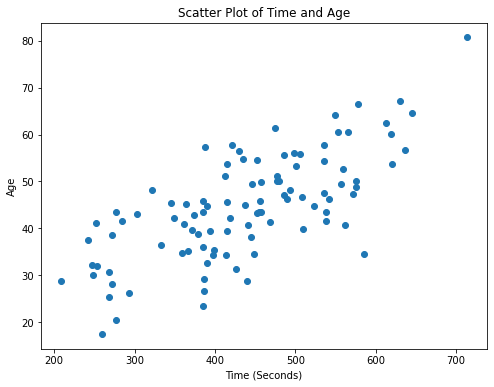

<Figure size 432x288 with 0 Axes>

In [149]:
# Create a scatter plot of time vs age
plt.figure(figsize=(8,6))

plt.scatter(website.time_seconds, website.age)
plt.title('Scatter Plot of Time and Age')
plt.xlabel('Time (Seconds)')
plt.ylabel('Age')

# Show then clear plot
plt.show()
plt.clf()

### 2. Fit a linear model to predict time_seconds using the age variable.

In [134]:
# Fit a linear regression to predict time_seconds based on age
model = sm.OLS.from_formula('time_seconds ~ age', website)
results = model.fit()

print(results.params)

Intercept    128.967945
age            6.913758
dtype: float64


### 3. Use the coefficients from the linear model to plot the regression line on top of the original plot.

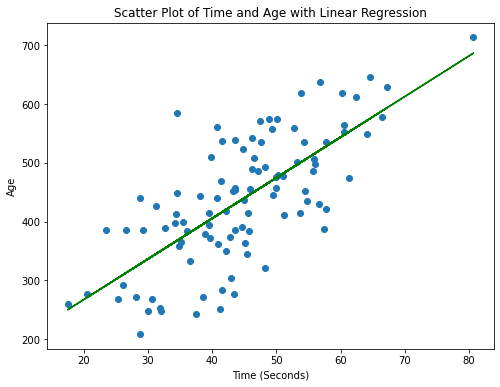

<Figure size 432x288 with 0 Axes>

In [150]:
# Plot the scatter plot with the line on top
plt.figure(figsize=(8,6))

plt.scatter(website.age, website.time_seconds)
plt.title('Scatter Plot of Time and Age with Linear Regression')
plt.plot(website.age, results.params[0] + results.params[1]*website.age, color = 'g')
plt.xlabel('Time (Seconds)')
plt.ylabel('Age')

# Show then clear plot
plt.show()
plt.clf()

### 4. Calculate the fitted values and residuals.

In [148]:
# Calculate fitted values
fitted_values = results.predict(website)

# Calculate residuals
residuals = website.time_seconds - fitted_values

print('Fitted values\n',fitted_values)
print('\n')
print('Residuals\n',residuals)

Fitted values
 0     454.605928
1     575.596686
2     442.852540
3     366.801206
4     345.368558
         ...    
95    429.716401
96    545.176152
97    440.778413
98    290.749873
99    395.838988
Length: 100, dtype: float64


Residuals
 0      31.394072
1      70.103314
2     -97.852540
3      46.598794
4      81.031442
         ...    
95     26.983599
96     73.923848
97    -76.478413
98     94.550127
99   -124.138988
Length: 100, dtype: float64


### 5. Check the normality assumption by plotting a histogram of the residuals and quantile-quantile plot (Q-Q plot)

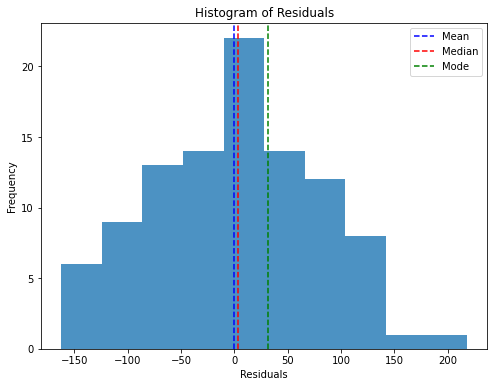

Skew:  -0.00782206544358625


<Figure size 432x288 with 0 Axes>

In [153]:
# Check normality assumption
plt.figure(figsize=(8,6))
plt.hist(residuals, alpha = 0.8)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Draw a mean line, median line
plt.axvline(residuals.mean(), color='b', linestyle='dashed', linewidth=1.5)
plt.axvline(residuals.median(), color='r',linestyle='dashed', linewidth=1.5)
plt.axvline(mode(residuals), color='g',linestyle='dashed', linewidth=1.5)

# Show then clear the plot
plt.legend({'Mean':residuals.mean(),'Median':residuals.median(),'Mode':mode(residuals)})
plt.show()
plt.clf()

# Check the skew
print('Skew: ',skew(residuals))

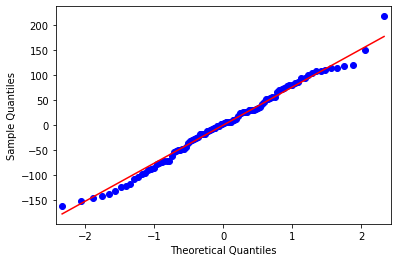

<Figure size 432x288 with 0 Axes>

In [152]:
# Q-Q plot
sm.qqplot(residuals, line='s')

plt.show()
plt.clf()

The Histograms of the Residuals chart show that there are bell-shaped with the skewness <b>-0.0078</b> between −1/2 and +1/2 the distribution is approximately symmetric.
The values of mean, median, and mode are approximately equal. 
Additionally, the Q-Q plot figures that most of the points clearly follow the straight line.
So that Residuals is truly come from Normal distributions.

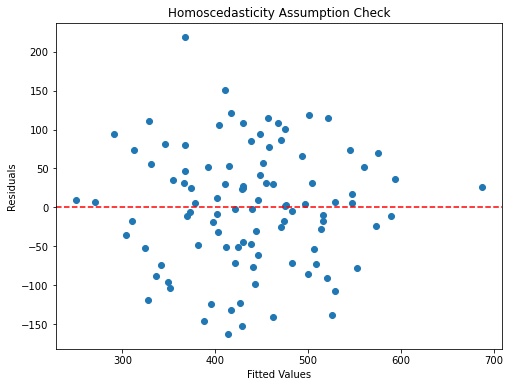

<Figure size 432x288 with 0 Axes>

In [140]:
# Check homoscedasticity assumption
plt.figure(figsize=(8,6))

plt.scatter(fitted_values, residuals)
plt.title('Homoscedasticity Assumption Check')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='dashed')

# Show then clear the plot
plt.show()
plt.clf()


This plot looks like a random splatter of points, centered around <b>y=0</b>, so the homoscedasticity assumption is met.

In [141]:
# Predict amount of time on website for 40 year old
pred40 = results.params[0] + results.params[1]*40
print('Predicted time on website for a 40 year old: ', pred40, 'seconds')


Predicted time on website for a 40 year old:  405.51824893244947 seconds


## Regression model with a binary predictor
### 1. Fit a model that predicts time_seconds based on web_browser and print the coefficients


In [142]:
# Fit a linear regression to predict time_seconds based on age
model2 = sm.OLS.from_formula('time_seconds ~ browser', website)
results2 = model2.fit()
print(results2.params)


Intercept            489.704255
browser[T.Safari]    -99.057086
dtype: float64


### 2. Binary predictor ( Safari = 0, Chrome = 1) and comparision.

In [143]:
# Calculate and print the group means (for comparison)
mean_time_chrome = np.mean(website.time_seconds[website.browser == 'Chrome'])
mean_time_safari = np.mean(website.time_seconds[website.browser == 'Safari'])
print('Mean time (Chrome): ', mean_time_chrome)
print('Mean time (Safari): ', mean_time_safari)
print('Mean time difference: ', mean_time_chrome - mean_time_safari)

Mean time (Chrome):  489.70425531914907
Mean time (Safari):  390.64716981132074
Mean time difference:  99.05708550782833


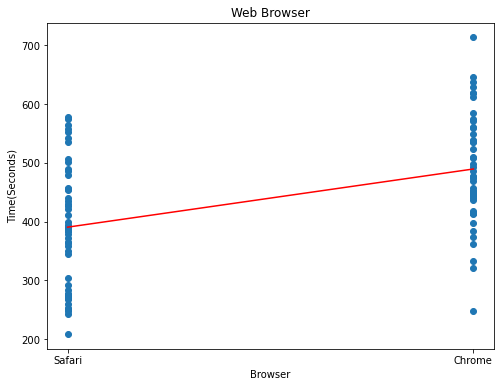

<Figure size 432x288 with 0 Axes>

In [144]:
# Create scatter plot for binary predictors 
plt.figure(figsize=(8,6))

plt.scatter(website.browser, website.time_seconds)
plt.title('Web Browser') 
plt.xlabel('Browser')
plt.ylabel('Time(Seconds)')

# Add the line using calculated group means
plt.plot([0,1], [mean_time_safari, mean_time_chrome], color = 'r')
 
# Show the plot
plt.show()
plt.clf()

From the website dataset, it shows that people who use Chrome tend to spend more time than people who use Safari, with the average of time spent are 489.70 seconds and 390.64 seconds for Chrome and Safari respectively.